In [376]:

import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten


from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from keras.callbacks import EarlyStopping

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

from datetime import datetime

import os

In [377]:
# importing data
a1 = np.load('D:/Uni/this term/Pattern Recognition/CA/features_label2_4.npy', allow_pickle = True)
a2 = np.load('D:/Uni/this term/Pattern Recognition/CA/features_label5_7.npy', allow_pickle = True)
a3 = np.load('D:/Uni/this term/Pattern Recognition/CA/features_label10.npy', allow_pickle = True)
a4 = np.load('D:/Uni/this term/Pattern Recognition/CA/features_label11_13.npy', allow_pickle = True)
a5 = np.load('D:/Uni/this term/Pattern Recognition/CA/features_label14_17.npy', allow_pickle = True)

In [378]:
a = np.concatenate((a1,a2,a3,a4,a5),axis=0)
a.shape

(1989,)

In [379]:
#shuffling
import random
random.shuffle(a)

In [380]:
features_label = [ele for ele in a if ele != []] 

In [381]:
features = []
for i in range(0, len(features_label)):
    features.append(np.concatenate((features_label[i][0], features_label[i][1], 
                features_label[i][2], features_label[i][3],
                features_label[i][4]), axis=0))

In [382]:
np.shape(features)

(1983, 193)

In [383]:
labels = []
for i in range(0, len(features_label)):
    labels.append(features_label[i][5])

In [384]:
len(labels)

1983

In [385]:
X = np.array(features)

In [386]:
y = np.array(labels)

In [387]:
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(y))

In [388]:
X.shape

(1983, 193)

In [389]:
y.shape


(1983, 2)

In [390]:
X_train = X[:1389]
y_train = y[:1389]

X_val = X[1389:1786]
y_val = y[1389:1786]

X_test = X[1786:]
y_test = y[1786:]

In [391]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [392]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping


model = Sequential()

model.add(Dense(193, input_shape=(193,), activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))  

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))    

model.add(Dense(2, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [393]:
# fitting the model with the train data and validation with the validation data
# we used early stop with patience 15
history = model.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_val, y_val),)# Checking how our model looks like and how many parameters it has

Epoch 1/100
6/6 [==============================] - 0s 33ms/step - loss: 0.6650 - accuracy: 0.6580 - val_loss: 0.3716 - val_accuracy: 0.9068
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.3599 - accuracy: 0.8798 - val_loss: 0.2130 - val_accuracy: 0.9295
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 0.2454 - accuracy: 0.9172 - val_loss: 0.1805 - val_accuracy: 0.9471
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.2193 - accuracy: 0.9374 - val_loss: 0.1636 - val_accuracy: 0.9471
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 0.1821 - accuracy: 0.9460 - val_loss: 0.1360 - val_accuracy: 0.9496
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 0.1513 - accuracy: 0.9489 - val_loss: 0.1210 - val_accuracy: 0.9521
Epoch 7/100
6/6 [==============================] - 0s 19ms/step - loss: 0.1215 - accuracy: 0.9611 - val_loss: 0.1075 - val_accuracy: 0.9547
Epoch 8/100
6/6 [===

In [394]:
# Checking how our model looks like and how many parameters it has
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 193)               37442     
_________________________________________________________________
dropout_12 (Dropout)         (None, 193)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               24832     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                

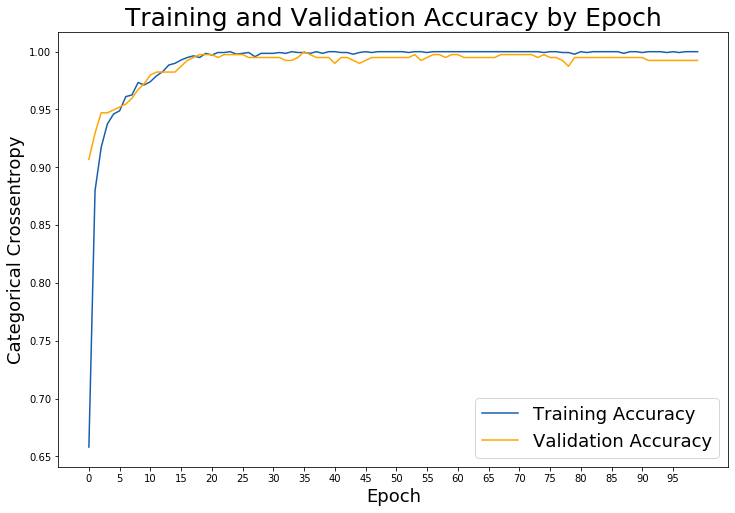

In [395]:
import matplotlib.pyplot as plt

# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18);

In [396]:
# Using our model to get the predictions for our test data
preds = model.predict_classes(X_test)

In [397]:
arr = labels[1786:] - preds
accuracy = (len(arr) - np.count_nonzero(arr)) / len(arr)
print(accuracy)

0.9898477157360406


In [398]:
########### Linear SVM

In [399]:
from sklearn import svm

In [400]:
#features , labels
X_train = features[:1258]
y_train = labels[:1258]

X_val = features[1258:1618]
y_val = labels[1258:1618]

X_test = features[1618:]
y_test = labels[1618:]


In [401]:
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)
preds = clf.predict(X_val)

In [402]:
arr = y_val - preds
accuracy = (len(arr) - np.count_nonzero(arr)) / len(arr)
print(accuracy)

0.9277777777777778


In [403]:
import sklearn
sklearn.metrics.confusion_matrix(y_val, preds)

array([[162,  16],
       [ 10, 172]], dtype=int64)

In [404]:
preds2 = clf.predict(X_test)
arr = y_test - preds2
accuracy = (len(arr) - np.count_nonzero(arr)) / len(arr)
print(accuracy)

0.9561643835616438


In [405]:
sklearn.metrics.confusion_matrix(y_test, preds2)

array([[167,   5],
       [ 11, 182]], dtype=int64)

In [406]:
############### SVM with Polynomial Kernel

In [407]:
clf = svm.SVC(kernel='poly', C = 1.0)
clf.fit(X_train,y_train)
preds = clf.predict(X_val)

E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [408]:
arr = y_val - preds
accuracy = (len(arr) - np.count_nonzero(arr)) / len(arr)
print(accuracy)

0.9777777777777777


In [409]:
import sklearn
sklearn.metrics.confusion_matrix(y_val, preds)

array([[174,   4],
       [  4, 178]], dtype=int64)

In [410]:
preds2 = clf.predict(X_test)
arr = y_test - preds2
accuracy = (len(arr) - np.count_nonzero(arr)) / len(arr)
print(accuracy)

0.9753424657534246


In [411]:
sklearn.metrics.confusion_matrix(y_test, preds2)

array([[169,   3],
       [  6, 187]], dtype=int64)

In [412]:
################## Naive Bayes

In [413]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
preds = gnb.fit(X_train, y_train).predict(X_val)

In [414]:
arr = y_val - preds
accuracy = (len(arr) - np.count_nonzero(arr)) / len(arr)
print(accuracy)

0.6416666666666667


In [415]:
sklearn.metrics.confusion_matrix(y_val, preds)

array([[ 60, 118],
       [ 11, 171]], dtype=int64)

In [416]:
preds = gnb.fit(X_train, y_train).predict(X_test)
arr = y_test - preds
accuracy = (len(arr) - np.count_nonzero(arr)) / len(arr)
print(accuracy)

0.6493150684931507


In [417]:
sklearn.metrics.confusion_matrix(y_test, preds)

array([[ 57, 115],
       [ 13, 180]], dtype=int64)

In [418]:
import scipy.cluster.hierarchy as shc

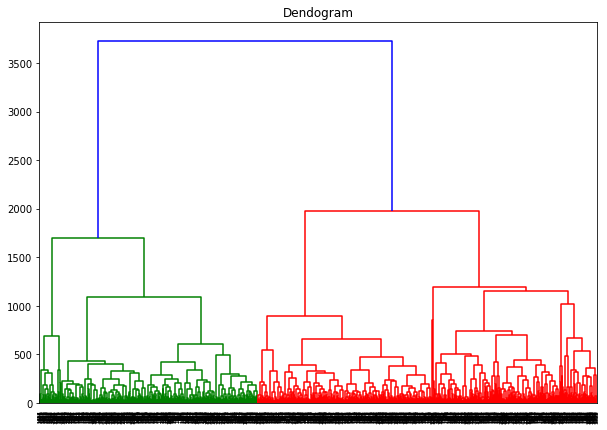

In [419]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(features, method='ward'))

In [420]:
## based on the dendgram and lifetimes, the best number of clusters seems to be : 2, Hence: 
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ClusterLabels = cluster.fit_predict(features)
print(ClusterLabels)

[0 0 1 ... 1 0 1]


In [421]:
arr = labels - ClusterLabels
accuracy = (len(arr) - np.count_nonzero(arr)) / len(arr)
print(accuracy)

0.6086737266767523


In [422]:
## based on the dendgram and lifetimes, the best number of clusters seems to be : 2, Hence:  
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
normalized_features = ss.fit_transform(features)


cluster = KMeans(n_clusters=2).fit(normalized_features)
ClusterLabels = cluster.fit_predict(normalized_features)
print(ClusterLabels)

[1 1 1 ... 1 1 1]


In [423]:

arr = labels - ClusterLabels
accuracy = (len(arr) - np.count_nonzero(arr)) / len(arr)
print(accuracy)

0.524457892082703


In [424]:
################## PCA

In [425]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(features)
X_pca = pca.transform(features)
X_new = pca.inverse_transform(X_pca)

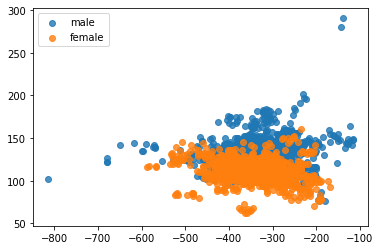

In [426]:
Data = np.array(X_new)
indices_of_males = np.where(np.array(labels) == 0)
indices_of_females = np.where(np.array(labels) == 1)
male = np.take(Data, indices_of_males, axis=0)
m = male[0,:,:]
female = np.take(Data, indices_of_females, axis=0)
f = female[0,:,:]
plt.scatter(m[:, 0],  m[:, 1], alpha=0.8, label='male')
plt.scatter(f[:, 0], f[:, 1], alpha=0.8, label='female')
plt.legend()
plt.show()

In [428]:
### Analysis of Clustering with respect to "identity", investigation of high number of clusters

In [484]:
# importing data
a1 = np.load('D:/Uni/this term/Pattern Recognition/CA/features_label2_4.npy', allow_pickle = True)
a2 = np.load('D:/Uni/this term/Pattern Recognition/CA/features_label5_7.npy', allow_pickle = True)
a3 = np.load('D:/Uni/this term/Pattern Recognition/CA/features_label10.npy', allow_pickle = True)
a4 = np.load('D:/Uni/this term/Pattern Recognition/CA/features_label11_13.npy', allow_pickle = True)
a5 = np.load('D:/Uni/this term/Pattern Recognition/CA/features_label14_17.npy', allow_pickle = True)

In [485]:
a = np.concatenate((a1,a2,a3,a4,a5),axis=0)
a.shape

(1989,)

In [489]:
import pandas as pd

df = pd.read_csv (r'D:/Uni/this term/Pattern Recognition/CA/info_true_subject_DS.csv')

In [490]:
len(df.subject)

1989

In [491]:
features_label = [ele for ele in a if ele != []] 

In [492]:
to_remove = [i for i,x in enumerate(a) if not x]
subjects = np.array(df.subject)
subjects = np.delete(subjects,to_remove)

In [493]:
len(subjects)

1983

In [494]:
len(features_label)

1983

In [495]:
import random
temp = list(zip(features_label, subjects)) 
random.shuffle(temp) 
features_label, subjects = zip(*temp) 

In [499]:
features = []
for i in range(0, len(features_label)):
    features.append(np.concatenate((features_label[i][0], features_label[i][1], 
                features_label[i][2], features_label[i][3],
                features_label[i][4]), axis=0))

In [500]:
# Clustering using Agglomerstive algorithm for high number of classifiers
number_of_clusters = np.max(subjects)
cluster = AgglomerativeClustering(n_clusters= number_of_clusters, affinity='euclidean', linkage='ward')
ClusterLabels = cluster.fit_predict(features)

In [510]:
arr = np.zeros([len(subjects),2])
arr[:,0] = subjects
arr[:,1] = ClusterLabels
sorted_arr = arr[np.argsort(arr[:, 0])]

In [513]:
fname = 'D:/Uni/this term/Pattern Recognition/CA/clustering.csv'
np.savetxt(fname, sorted_arr, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

In [589]:
current_cluster = list([])
all_clusters_list = list([]) 
prev_var = 1
for i in range(0,len(sorted_arr)):
    var = sorted_arr[i,0]
    if var > prev_var:
        all_clusters_list.append(current_cluster)
        current_cluster = list([])
        current_cluster.append(sorted_arr[i,1])
        prev_var = var
        continue
    current_cluster.append(sorted_arr[i,1])
    prev_var = var
all_clusters_list.append(list(sorted_arr[1973:1983,1]))

In [593]:
def get_maximum_freuency_and_most_frequent(test_list):
    maxim = 0
    res = test_list[0] 
    for i in test_list: 
        freq = test_list.count(i) 
        if freq > maxim: 
            maxim = freq 
            res = i
    return maxim, res

In [594]:
sizes_of_clusters = np.zeros(115)
for i in range(0,115):
    sizes_of_clusters[i] = len(all_clusters_list[i])

In [596]:
most_frequencies_in_clusters = np.zeros(115)
num_of_frequent_subject = np.zeros(115)
for i in range(0,115):
    most_frequencies_in_clusters [i],num_of_frequent_subject[i] = get_maximum_freuency_and_most_frequent(all_clusters_list[i])

In [598]:
cluster_significancy = np.zeros(115)
for i in range(0,115):
    cluster_significancy[i] = most_frequencies_in_clusters[i] / sizes_of_clusters[i] 

In [601]:
print(sum(cluster_significancy > 0.5))

50


In [435]:
# Statistical Analysis of Data : Age and Gender (Because of the error in csv format we ommited gender data of folders 1, 8,9)
# But for "age" we used the whole data

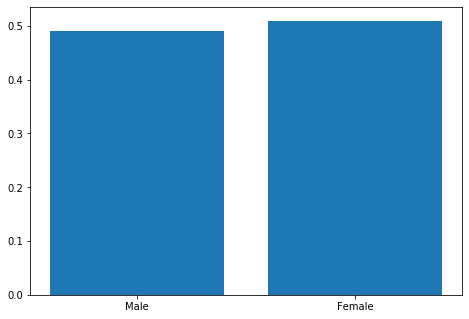

In [461]:
Percentage_of_Male = len(np.where(df.label == 0)[0]) / len(df.label)
Percentage_of_Female = len(np.where(df.label == 1)[0]) / len(df.label)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
s = ['Male', 'Female']
percentages = [Percentage_of_Male , Percentage_of_Female]
ax.bar(s,percentages)
plt.show()

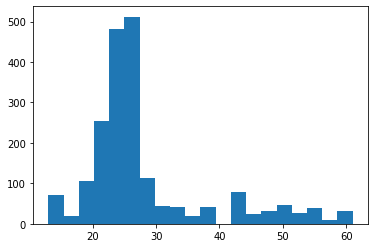

In [476]:
ages = 1399 - df.birth 
number_of_bins = 20
plt.hist(ages, bins = number_of_bins)
plt.show()

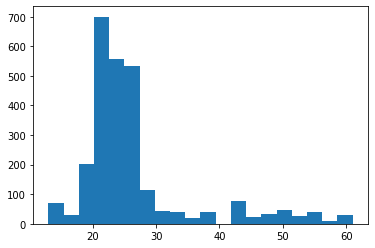

In [481]:
import pandas as pd

dff = pd.read_csv (r'D:/Uni/this term/Pattern Recognition/CA/info_true_subject _all.csv')
ages = 1399 - dff.birth 
number_of_bins = 20
plt.hist(ages, bins = number_of_bins)
plt.show()

In [482]:
np.mean(np.array(ages))

26.44136622390892